In [1]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Import MNIST Data From Sklearn Datasets

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

C:\Users\Ziad\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, 
               interpolation="nearest")
    plt.axis("off")

# Visualize Digits 

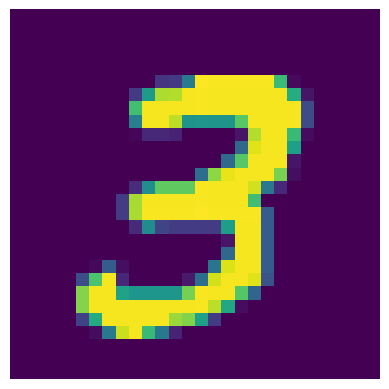

In [4]:
plot_digit(mnist['data'][7])

# Spliting the data train and test and validation 

In [5]:
X_train_val,X_test,y_train_val,y_test = train_test_split(mnist.data,mnist.target,test_size=10000,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=10000, random_state=42)

In [6]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import LinearSVC 
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

In [7]:
random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
extra_trees_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
svm_clf = LinearSVC(max_iter=100, tol=20, random_state=42)
mlp_clf = MLPClassifier(random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=7)

# **Training the Algorithmes individually**

In [8]:
estimators = [random_forest_clf,extra_trees_clf,svm_clf,mlp_clf,knn_clf]
for estimator in estimators:
    print("Training",estimator)
    estimator.fit(X_train,y_train)

Training RandomForestClassifier(random_state=42)
Training ExtraTreesClassifier(random_state=42)
Training LinearSVC(max_iter=100, random_state=42, tol=20)


C:\Users\Ziad\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Training MLPClassifier(random_state=42)
Training KNeighborsClassifier(n_neighbors=7)


## Scores

In [9]:
[estimator.score(X_val,y_val) for estimator in estimators]

[0.9692, 0.9715, 0.859, 0.961, 0.9687]

# **Voting Classifier** 

**Voting classifiers combine predictions from multiple individual classifiers, and the final prediction is determined by a majority vote. In a hard voting classifier, the class with the most votes becomes the ensemble's prediction, making it a simple and effective approach for improving overall model performance.**

In [10]:
from sklearn.ensemble import VotingClassifier

In [11]:
named_estimators=[('rf',random_forest_clf),
                  ('et',extra_trees_clf),
                 ('svm',svm_clf),
                 ('knn',knn_clf),
                   ("mlp", mlp_clf)]

voting_clf = VotingClassifier(named_estimators)
voting_clf.fit(X_train,y_train)

C:\Users\Ziad\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('et', ExtraTreesClassifier(random_state=42)),
                             ('svm',
                              LinearSVC(max_iter=100, random_state=42, tol=20)),
                             ('knn', KNeighborsClassifier(n_neighbors=7)),
                             ('mlp', MLPClassifier(random_state=42))])

### Hard Voting

In [12]:
voting_clf.voting = "Hard" 

In [13]:
voting_clf.score(X_val, y_val) 

0.9733

In [14]:
voting_clf.set_params(svm=None)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('et', ExtraTreesClassifier(random_state=42)),
                             ('svm', None),
                             ('knn', KNeighborsClassifier(n_neighbors=7)),
                             ('mlp', MLPClassifier(random_state=42))],
                 voting='Hard')

In [15]:
voting_clf.estimators

[('rf', RandomForestClassifier(random_state=42)),
 ('et', ExtraTreesClassifier(random_state=42)),
 ('svm', None),
 ('knn', KNeighborsClassifier(n_neighbors=7)),
 ('mlp', MLPClassifier(random_state=42))]

### Remove Support Vector machine to detect if was hurting performance ?

In [16]:
del voting_clf.estimators_[2]

In [17]:
voting_clf.score(X_val, y_val)

0.9758

**the score after removing the Support Vector machine is higher**

# Try soft voting 

In [18]:
voting_clf.voting = "soft"

In [19]:
voting_clf.score(X_val, y_val)

0.9778

**Soft voting is higher than Hard**

### Test score

In [20]:
voting_clf.score(X_test, y_test)

0.9762

In [21]:
[estimator.score(X_test, y_test) for estimator in voting_clf.estimators_]

[0.9645, 0.9691, 0.9661, 0.9612]

# **Conclusion** 

**The voting classifier reduced the error rate of the best model in this case. support vector machine was hurting the score becuse he was tha lowest vlidaation score 
not all cases the soft voting is higher and sometimes the voting classifier reduced the error rate of the best model very slightly**


